
# Define Quotes Tags Using (Natural language processing(NLP)

### Shaikha Bin Ateeq & Raghad Althunayan 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#d">Data Cleaning And Preprocessing</a></li>
<li><a href="#dd">Exploratory data analysis (EDA) </a></li>
<li><a href="#ddd">Topic Modeling</a></li>    
<li><a href="#dddd">Modeling</a></li> 
<li><a href="#ddddd">CountVectorizer:</a></li>

<li><a href="#a">Latent Dirichlet Allocation (LDA)</a></li>
<li><a href="#aa">Latent Semantic Analysis (LSA)</a></li>
<li><a href="#aaa">Non-Negative Matrix Factorization (NMF) </a></li>
<li><a href="#aaaa">TfidfVectorizer:</a></li>    
<li><a href="#aaaaa">Latent Dirichlet Allocation (LDA)</a></li> 
<li><a href="#b">Latent Semantic Analysis (LSA)</a></li> 
<li><a href="#bb">Non-Negative Matrix Factorization (NMF)</a></li> 


<li><a href="#c">CorEx</a></li> 
<li><a href="#cc">CorEx With Anchors</a></li> 
<li><a href="#ccc">Word Clouds for each topic</a></li> 
<li><a href="#cccc">CorEx With Anchors With Supervised</a></li> 
<li><a href="#ccccc">Logistic Regression</a></li> 
<li><a href="#cccccc">RandomForestClassifier</a></li> 
<li><a href="#cccccc">CorEx With Anchors With SemiSupervised</a></li> 

</ul>

<a id='intro'></a>
## Introduction


Quotes have the power to motivate, inspire and encourage At such time, read a few quotes, and you will see how your mood and state of mind begin improve

the goal of this project is to predict the quote tags whether 'Sadnesses','Knowledge','Universe','Feelings'

**Import packiges:**

In [ ]:
'''
pip install spellchecker
pip install pyspellchecker
!pip install textblob
!pip install spacy
! python -m spacy download en_core_web_sm
!pip install contractions==0.0.18
pip install gensim
pip install corextopic 
pip install wordcloud

'''

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import string as st
import random
import re
import os
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from scipy import linalg
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from collections import Counter
import contractions
import string
import spacy
nltk.download('words')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
en = spacy.load('en_core_web_sm')
from spellchecker import SpellChecker



from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, similarities, matutils
from corextopic import corextopic as ct 



import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



[nltk_data] Downloading package words to /Users/shaikha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shaikha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



**Read Dataset:**

In [ ]:
df= pd.read_csv("quotes.csv")
df.head(5)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh..."


**Explore The Dataset:**

In [ ]:
df.shape

(499709, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499709 entries, 0 to 499708
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   quote     499708 non-null  object
 1   author    497956 non-null  object
 2   category  499646 non-null  object
dtypes: object(3)
memory usage: 11.4+ MB


In [ ]:
df.quote=df.quote.astype(str)
df.author=df.author.astype(str)
df.category=df.category.astype(str) 

In [ ]:
df.isna().sum()

quote       0
author      0
category    0
dtype: int64

**Take Subset Of Qoutes More Than 150 Word :**

In [ ]:
def counts(text):
    return len(text.split())

df['CountsWords'] = df['quote'].apply(lambda x : counts(x) if counts(x) > 150 else np.nan)

In [ ]:
df[list(df.columns)].isnull().sum()

quote               0
author              0
category            0
CountsWords    488415
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(11294, 4)

<a id='d'></a>
# **Data Cleaning And Preprocessing:**

 **Contraction:**

In [ ]:
df['quote']=df['quote'].apply(lambda x: contractions.fix(x))

**Converting letters to lowercase:**


In [ ]:
df.loc[:,"quote"] = df.quote.apply(lambda x : str.lower(x))

**Noun_English_Word**:

In [ ]:
words = set(nltk.corpus.words.words())
def Noun_English_Word(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
df["quote"] = df["quote"].apply(lambda text: Noun_English_Word(text))

**Tokenization:**

In [ ]:
df['quote'] = list(nlp.pipe(df.quote))

**Removing Stop Words:**


In [ ]:
sw_spacy = en.Defaults.stop_words
def remove_stop_words1(text):
    return ' '.join([word for word in str(text).split() if word not in (sw_spacy)])
df['quote'] = df['quote'].apply(remove_stop_words1)

**Removing punctuations:**


In [ ]:
df['quote'] = df['quote'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

**Removing numbers:**


In [ ]:
df["quote"]=df.quote.replace('\w*\d\w*', '', regex=True)

**Removing rare words**


In [ ]:
cnt = Counter()
num_rare_words = 10
rare_words = set([w for (w, wc) in cnt.most_common()[:-num_rare_words-1:-1]])
def remove_rare(text):
    return " ".join([word for word in str(text).split() if word not in rare_words])
df["quote"] = df["quote"].apply(lambda text: remove_rare(text))    

**Remove Repeating Char**

In [ ]:
def remove_repeating_char(text):
    text = str(text)
    return re.sub('(.)\\1{2,}', '\\1', text)
df['quote'] = df['quote'].apply(remove_repeating_char)

**Spell Corrections:**

In [ ]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
df["text_corrected"] = df["quote"].apply(lambda text: correct_spellings(text))

**Stemming:**

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df["text_stemmed"] = df["text_corrected"].apply(lambda text: stem_words(text))

**Lemmatization:**

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_lemmatized"] = df["text_stemmed"].apply(lambda text: lemmatize_words(text))



**Remove Word Less Than 3:**

In [ ]:
df["FinalQuot"]=df.text_lemmatized.str.replace(r'\b(\w{1,3})\b', '')

<ipython-input-24-3168ec125396>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["FinalQuot"]=df.text_lemmatized.str.replace(r'\b(\w{1,3})\b', '')


**Remove Most Common Words:**

In [ ]:
cnt = Counter()
for txt in df["FinalQuot"].values:
    for word in txt.split():
        cnt[word]+=1
cnt.most_common(10)
frequent_words = set([w for(w,wc) in cnt.most_common(10)])
def remover(txt):
    return " ".join([word for word in str(txt).split() if word not in frequent_words])

df["FinalQuot"] = df["FinalQuot"].apply(lambda txt: remover(txt))
df.head()

,quote,author,category,CountsWords,text_corrected,text_stemmed,text_lemmatized,FinalQuot
6,life truly believe find completely turn world ...,Bob Marley,love,450.0,life truly believe find completely turn world ...,life truli believ find complet turn world tell...,life truli believ find complet turn world tell...,truli believ find complet turn tell soul absor...
15,life matter going mess universal truth good de...,Marilyn Monroe,"attributed-no-source, friends, heartbreak, ins...",201.0,life matter going mess universal truth good de...,life matter go mess univers truth good decid g...,life matter go mess univers truth good decid g...,matter mess univers truth good decid mess reme...
24,people think soul mate perfect fit true soul m...,"Elizabeth Gilbert, Eat, Pray, Love",love,155.0,people think soul mate perfect fit true soul m...,peopl think soul mate perfect fit true soul ma...,peopl think soul mate perfect fit true soul ma...,soul mate perfect true soul mate mirror person...
63,promise strong disturb peace mind talk health ...,"Christian D. Larson, Your Forces and How to Us...","happiness, inspirational, love, optimism, stre...",180.0,promise strong disturb peace mind talk health ...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...
98,love horrible vulnerable chest heart inside me...,"Neil Gaiman, The Kindly Ones",love,167.0,love horrible vulnerable chest heart inside me...,love horribl vulner chest heart insid mess bui...,love horribl vulner chest heart insid mess bui...,horribl vulner chest heart insid mess build bu...


In [ ]:
cnt.most_common(10)

[('like', 8328),
 ('life', 6338),
 ('time', 6302),
 ('peopl', 5889),
 ('know', 5802),
 ('love', 5298),
 ('world', 4697),
 ('said', 4502),
 ('think', 4296),
 ('come', 3754)]

**Remove Verbs:**

In [ ]:
from textblob import TextBlob
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ" or tag == "NN" ]

df['QuotWithout_Verb'] = df['FinalQuot'].apply(get_adjectives) 
df.QuotWithout_Verb=df.QuotWithout_Verb.astype(str)
df['QuotWithout_Verb'] = df['QuotWithout_Verb'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

**Count The Qout Length:**

In [ ]:
def counts(text):
    return len(text.split())

df['CountsWordsAfter'] = df['FinalQuot'].apply(lambda x : counts(x))

**Drop Duplicates After Cleaning:**

In [ ]:
print('Shape Befor',df.shape)
df = df.drop_duplicates()
print('Shape After',df.shape)

Shape Befor (11294, 10)
Shape After (11286, 10)


In [ ]:
df.head()

,quote,author,category,CountsWords,text_corrected,text_stemmed,text_lemmatized,FinalQuot,QuotWithout_Verb,CountsWordsAfter
6,life truly believe find completely turn world ...,Bob Marley,love,450.0,life truly believe find completely turn world ...,life truli believ find complet turn world tell...,life truli believ find complet turn world tell...,truli believ find complet turn tell soul absor...,complet turn soul actual hear share true throw...,114
15,life matter going mess universal truth good de...,Marilyn Monroe,"attributed-no-source, friends, heartbreak, ins...",201.0,life matter going mess universal truth good de...,life matter go mess univers truth good decid g...,life matter go mess univers truth good decid g...,matter mess univers truth good decid mess reme...,matter mess good decid mess rememb stay true r...,36
24,people think soul mate perfect fit true soul m...,"Elizabeth Gilbert, Eat, Pray, Love",love,155.0,people think soul mate perfect fit true soul m...,peopl think soul mate perfect fit true soul ma...,peopl think soul mate perfect fit true soul ma...,soul mate perfect true soul mate mirror person...,soul mate perfect true soul mate mirror person...,47
63,promise strong disturb peace mind talk health ...,"Christian D. Larson, Your Forces and How to Us...","happiness, inspirational, love, optimism, stre...",180.0,promise strong disturb peace mind talk health ...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,53
98,love horrible vulnerable chest heart inside me...,"Neil Gaiman, The Kindly Ones",love,167.0,love horrible vulnerable chest heart inside me...,love horribl vulner chest heart insid mess bui...,love horribl vulner chest heart insid mess bui...,horribl vulner chest heart insid mess build bu...,horribl vulner heart insid mess build suit arm...,41


**Save The Data After Cleaning AS CSV File:**

In [ ]:
df.to_csv('FinalQuotes.csv', index=False)

**Save The Data After Cleaning AS Pickle File:**

In [ ]:
with open('FinalQuotes.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

<a id='dd'></a>
# **Exploratory data analysis (EDA) :**

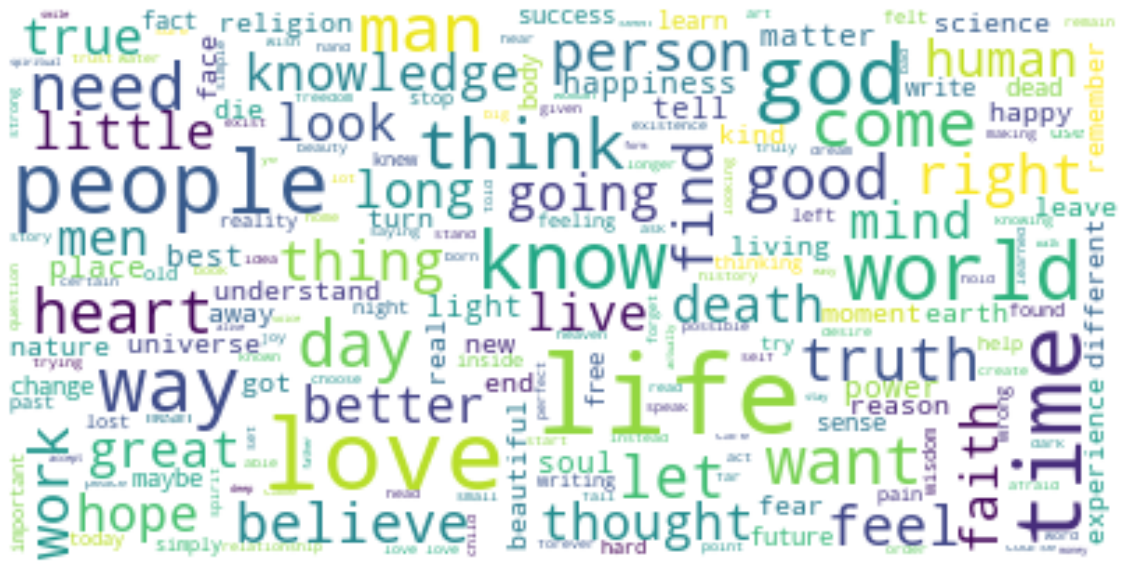

In [ ]:
dff = df['quot']
text = dff.str.cat(sep=' ')
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("one")

wc = WordCloud(max_font_size=40, max_words=200,stopwords=stopwords, contour_width=3, contour_color='steelblue' ,background_color="white")

wordcloud = wc.generate(text)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id='ddd'></a>

# **Topic Modeling:**

**Read Pickle**

In [2]:
with open('FinalQuotes.pickle','rb') as read_file:
    df = pickle.load(read_file)
    
df.head(5)

,quote,author,category,CountsWords,text_corrected,text_stemmed,text_lemmatized,FinalQuot,QuotWithout_Verb,CountsWordsAfter
6,life truly believe find completely turn world ...,Bob Marley,love,450.0,life truly believe find completely turn world ...,life truli believ find complet turn world tell...,life truli believ find complet turn world tell...,truli believ find complet turn tell soul absor...,complet turn soul actual hear share true throw...,114
15,life matter going mess universal truth good de...,Marilyn Monroe,"attributed-no-source, friends, heartbreak, ins...",201.0,life matter going mess universal truth good de...,life matter go mess univers truth good decid g...,life matter go mess univers truth good decid g...,matter mess univers truth good decid mess reme...,matter mess good decid mess rememb stay true r...,36
24,people think soul mate perfect fit true soul m...,"Elizabeth Gilbert, Eat, Pray, Love",love,155.0,people think soul mate perfect fit true soul m...,peopl think soul mate perfect fit true soul ma...,peopl think soul mate perfect fit true soul ma...,soul mate perfect true soul mate mirror person...,soul mate perfect true soul mate mirror person...,47
63,promise strong disturb peace mind talk health ...,"Christian D. Larson, Your Forces and How to Us...","happiness, inspirational, love, optimism, stre...",180.0,promise strong disturb peace mind talk health ...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,promis strong disturb peac mind talk health ha...,53
98,love horrible vulnerable chest heart inside me...,"Neil Gaiman, The Kindly Ones",love,167.0,love horrible vulnerable chest heart inside me...,love horribl vulner chest heart insid mess bui...,love horribl vulner chest heart insid mess bui...,horribl vulner chest heart insid mess build bu...,horribl vulner heart insid mess build suit arm...,41


In [3]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

<a id='ddddd'></a>
# CountVectorizer:

In [4]:
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['QuotWithout_Verb'])
doc_word.shape
pd.DataFrame(doc_word.toarray(), index=df['quote'], columns=vectorizer.get_feature_names()).head(10)

,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
quote,,,,,,,,,,,,,,,,,,,,,
life truly believe find completely turn world tell soul absorb actually want hear share future come true life thrown wonderful wait tell knowing share excitement embarrassed cry hurting laugh fool hurt feel like good build special beautiful pressure jealousy competition quiet calmness worry think love insignificant people note song walk invaluable kept safe heart cherish forever childhood come clear vivid like young brilliant laughter daily life infrequent exist phone day long day ’ s work smile face presence need continuous conversation find content nearby interested fascinating know important person special think person occasion simple bring mind like pale blue sky gentle wind storm cloud horizon open heart knowing chance broken day opening heart experience love joy possible find vulnerable way allow heart feel true pleasure real find strength knowing true friend possibly soul mate remain loyal end life completely different exciting hope security knowing life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
life matter going mess universal truth good decide going mess act like remember come stay true best let remember best world come baby hate actually pretty going break heart find find half goes fail mean going fail trying hold believe sweetie head high chin importantly smiling life s beautiful thing smile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
people think soul mate perfect fit true soul mate mirror person holding person attention change life true soul mate probably important person meet tear smack awake live soul mate forever painful soul come life reveal layer leave soul purpose shake tear apart ego little bit break heart open new light desperate control transform life introduce spiritual master,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
promise strong disturb peace mind talk health happiness person meet look sunny optimism come true think best work best expect best enthusiastic success forget press greater future wear cheerful countenance living creature meet smile time improvement time criticize large worry noble anger strong fear happy permit presence trouble think proclaim fact world loud great live faith world long true best,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
love horrible vulnerable chest heart inside mess build build suit armor hurt stupid person different stupid person stupid life piece ask dumb day like kiss smile life love inside eats leaves crying darkness simple phrase like maybe turns glass splinter working way heart imagination mind soul hurt real inside apart pain hate love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seeking special person right begin suspect right person different wrong wrong way seek wrong complementary way lot living grow fully wrongness finally run unsolvable — truly — ready find lifelong mate finally know looking looking wrong person wrong person got right wrong person — lovingly gaze think “ problem want ” find special person wrong right way,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clatter basilisk s arms running flung neck mouth threw away broomstick holding enthusiasm moment harry weakly firmly swayed spot raised voice war going broke apart arms know mate said recently hit head mind harry d think hold got diadem yeah right sorry said set gathering pink face,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
god good lord sixth day overtime angel said lot fiddling god said read specs order completely washable plastic replaceable run black coffee lap kiss cure broken leg disappointed love affair angel shook head slowly said way causing god standard model angel god pair closed head know course look child understand love word god said angel touching sleeve gently rest tomorrow said god close close sick feed family pound hamburger year old stand shower angel circled model mother slowly soft tough said god excitedly imagine 

<a id='a'></a>
 ### **Latent Dirichlet Allocation (LDA):**

In [5]:
vectorizer.fit(df['QuotWithout_Verb'])
doc_word = vectorizer.transform(df['QuotWithout_Verb']).transpose()
pd.DataFrame(doc_word.toarray(), vectorizer.get_feature_names()).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11276,11277,11278,11279,11280,11281,11282,11283,11284,11285
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
abbot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
len(id2word)
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=5)

2021-12-30 21:00:10,044 : INFO : using symmetric alpha at 0.25
2021-12-30 21:00:10,046 : INFO : using symmetric eta at 0.25
2021-12-30 21:00:10,051 : INFO : using serial LDA version on this node
2021-12-30 21:00:10,060 : INFO : running online (multi-pass) LDA training, 4 topics, 5 passes over the supplied corpus of 11286 documents, updating model once every 2000 documents, evaluating perplexity every 11286 documents, iterating 50x with a convergence threshold of 0.001000
2021-12-30 21:00:10,095 : INFO : PROGRESS: pass 0, at document #2000/11286
2021-12-30 21:00:11,200 : INFO : merging changes from 2000 documents into a model of 11286 documents
2021-12-30 21:00:11,204 : INFO : topic #0 (0.250): 0.007*"heart" + 0.007*"good" + 0.006*"thing" + 0.005*"live" + 0.005*"night" + 0.005*"death" + 0.005*"great" + 0.005*"mind" + 0.005*"look" + 0.004*"littl"
2021-12-30 21:00:11,205 : INFO : topic #1 (0.250): 0.009*"person" + 0.006*"live" + 0.006*"human" + 0.006*"work" + 0.005*"good" + 0.005*"look" +

2021-12-30 21:00:18,768 : INFO : topic #0 (0.250): 0.010*"heart" + 0.009*"night" + 0.006*"dark" + 0.006*"good" + 0.005*"live" + 0.005*"look" + 0.005*"littl" + 0.005*"beauti" + 0.005*"light" + 0.005*"head"
2021-12-30 21:00:18,769 : INFO : topic #1 (0.250): 0.012*"person" + 0.009*"live" + 0.009*"human" + 0.008*"good" + 0.006*"work" + 0.006*"happi" + 0.005*"natur" + 0.005*"feel" + 0.005*"thing" + 0.005*"heart"
2021-12-30 21:00:18,771 : INFO : topic #2 (0.250): 0.009*"work" + 0.006*"human" + 0.005*"power" + 0.005*"good" + 0.005*"believ" + 0.004*"natur" + 0.004*"fact" + 0.004*"polit" + 0.004*"mind" + 0.004*"book"
2021-12-30 21:00:18,772 : INFO : topic #3 (0.250): 0.007*"hand" + 0.006*"littl" + 0.006*"look" + 0.006*"face" + 0.006*"feel" + 0.005*"good" + 0.005*"woman" + 0.004*"right" + 0.004*"moment" + 0.004*"thing"
2021-12-30 21:00:18,773 : INFO : topic diff=0.395559, rho=0.361716
2021-12-30 21:00:18,798 : INFO : PROGRESS: pass 1, at document #6000/11286
2021-12-30 21:00:19,639 : INFO : merg

2021-12-30 21:00:24,996 : INFO : topic #3 (0.250): 0.008*"hand" + 0.007*"look" + 0.007*"littl" + 0.007*"face" + 0.006*"woman" + 0.005*"feel" + 0.005*"head" + 0.005*"right" + 0.005*"good" + 0.004*"bodi"
2021-12-30 21:00:24,997 : INFO : topic diff=0.306285, rho=0.340148
2021-12-30 21:00:25,023 : INFO : PROGRESS: pass 2, at document #8000/11286
2021-12-30 21:00:25,738 : INFO : merging changes from 2000 documents into a model of 11286 documents
2021-12-30 21:00:25,743 : INFO : topic #0 (0.250): 0.010*"heart" + 0.009*"night" + 0.008*"light" + 0.008*"dark" + 0.006*"littl" + 0.005*"place" + 0.005*"live" + 0.005*"beauti" + 0.005*"death" + 0.005*"head"
2021-12-30 21:00:25,745 : INFO : topic #1 (0.250): 0.012*"person" + 0.011*"good" + 0.010*"live" + 0.008*"human" + 0.006*"heart" + 0.006*"work" + 0.006*"feel" + 0.006*"great" + 0.005*"mind" + 0.005*"true"
2021-12-30 21:00:25,747 : INFO : topic #2 (0.250): 0.008*"work" + 0.007*"human" + 0.005*"power" + 0.005*"natur" + 0.004*"fact" + 0.004*"polit" +

2021-12-30 21:00:31,905 : INFO : topic #1 (0.250): 0.012*"person" + 0.011*"good" + 0.010*"live" + 0.008*"human" + 0.006*"feel" + 0.006*"heart" + 0.006*"mind" + 0.006*"work" + 0.006*"great" + 0.006*"true"
2021-12-30 21:00:31,933 : INFO : topic #2 (0.250): 0.007*"work" + 0.007*"human" + 0.005*"power" + 0.004*"natur" + 0.004*"social" + 0.004*"polit" + 0.004*"book" + 0.004*"fact" + 0.004*"gener" + 0.004*"moral"
2021-12-30 21:00:31,936 : INFO : topic #3 (0.250): 0.009*"hand" + 0.008*"look" + 0.008*"face" + 0.007*"littl" + 0.006*"head" + 0.005*"good" + 0.005*"feel" + 0.005*"woman" + 0.005*"right" + 0.005*"black"
2021-12-30 21:00:31,939 : INFO : topic diff=0.269102, rho=0.322028
2021-12-30 21:00:33,212 : INFO : -8.157 per-word bound, 285.4 perplexity estimate based on a held-out corpus of 1286 documents with 64142 words
2021-12-30 21:00:33,213 : INFO : PROGRESS: pass 3, at document #11286/11286
2021-12-30 21:00:33,850 : INFO : merging changes from 1286 documents into a model of 11286 document

2021-12-30 21:00:38,683 : INFO : topic diff=0.243184, rho=0.306526
2021-12-30 21:00:38,724 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=16521, num_topics=4, decay=0.5, chunksize=2000) in 28.63s', 'datetime': '2021-12-30T21:00:38.687929', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [7]:
lda.print_topics()

2021-12-30 21:00:38,739 : INFO : topic #0 (0.250): 0.010*"night" + 0.009*"dark" + 0.009*"heart" + 0.009*"light" + 0.005*"live" + 0.005*"beauti" + 0.005*"place" + 0.005*"littl" + 0.005*"death" + 0.005*"great"
2021-12-30 21:00:38,742 : INFO : topic #1 (0.250): 0.012*"person" + 0.011*"good" + 0.010*"live" + 0.008*"human" + 0.006*"great" + 0.006*"mind" + 0.006*"feel" + 0.006*"heart" + 0.006*"work" + 0.006*"true"
2021-12-30 21:00:38,744 : INFO : topic #2 (0.250): 0.007*"work" + 0.007*"human" + 0.004*"social" + 0.004*"natur" + 0.004*"power" + 0.004*"fact" + 0.004*"polit" + 0.004*"book" + 0.004*"gener" + 0.004*"state"
2021-12-30 21:00:38,745 : INFO : topic #3 (0.250): 0.009*"look" + 0.009*"hand" + 0.007*"face" + 0.007*"littl" + 0.007*"head" + 0.006*"good" + 0.005*"right" + 0.005*"feel" + 0.004*"thing" + 0.004*"room"


[(0,
  '0.010*"night" + 0.009*"dark" + 0.009*"heart" + 0.009*"light" + 0.005*"live" + 0.005*"beauti" + 0.005*"place" + 0.005*"littl" + 0.005*"death" + 0.005*"great"'),
 (1,
  '0.012*"person" + 0.011*"good" + 0.010*"live" + 0.008*"human" + 0.006*"great" + 0.006*"mind" + 0.006*"feel" + 0.006*"heart" + 0.006*"work" + 0.006*"true"'),
 (2,
  '0.007*"work" + 0.007*"human" + 0.004*"social" + 0.004*"natur" + 0.004*"power" + 0.004*"fact" + 0.004*"polit" + 0.004*"book" + 0.004*"gener" + 0.004*"state"'),
 (3,
  '0.009*"look" + 0.009*"hand" + 0.007*"face" + 0.007*"littl" + 0.007*"head" + 0.006*"good" + 0.005*"right" + 0.005*"feel" + 0.004*"thing" + 0.004*"room"')]

<a id='aa'></a>
### **Latent Semantic Analysis (LSA):**

In [8]:
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['QuotWithout_Verb'])
doc_word.shape
pd.DataFrame(doc_word.toarray(), index=df['quote'], columns=vectorizer.get_feature_names()).head(10)

,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
quote,,,,,,,,,,,,,,,,,,,,,
life truly believe find completely turn world tell soul absorb actually want hear share future come true life thrown wonderful wait tell knowing share excitement embarrassed cry hurting laugh fool hurt feel like good build special beautiful pressure jealousy competition quiet calmness worry think love insignificant people note song walk invaluable kept safe heart cherish forever childhood come clear vivid like young brilliant laughter daily life infrequent exist phone day long day ’ s work smile face presence need continuous conversation find content nearby interested fascinating know important person special think person occasion simple bring mind like pale blue sky gentle wind storm cloud horizon open heart knowing chance broken day opening heart experience love joy possible find vulnerable way allow heart feel true pleasure real find strength knowing true friend possibly soul mate remain loyal end life completely different exciting hope security knowing life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
life matter going mess universal truth good decide going mess act like remember come stay true best let remember best world come baby hate actually pretty going break heart find find half goes fail mean going fail trying hold believe sweetie head high chin importantly smiling life s beautiful thing smile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
people think soul mate perfect fit true soul mate mirror person holding person attention change life true soul mate probably important person meet tear smack awake live soul mate forever painful soul come life reveal layer leave soul purpose shake tear apart ego little bit break heart open new light desperate control transform life introduce spiritual master,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
promise strong disturb peace mind talk health happiness person meet look sunny optimism come true think best work best expect best enthusiastic success forget press greater future wear cheerful countenance living creature meet smile time improvement time criticize large worry noble anger strong fear happy permit presence trouble think proclaim fact world loud great live faith world long true best,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
love horrible vulnerable chest heart inside mess build build suit armor hurt stupid person different stupid person stupid life piece ask dumb day like kiss smile life love inside eats leaves crying darkness simple phrase like maybe turns glass splinter working way heart imagination mind soul hurt real inside apart pain hate love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seeking special person right begin suspect right person different wrong wrong way seek wrong complementary way lot living grow fully wrongness finally run unsolvable — truly — ready find lifelong mate finally know looking looking wrong person wrong person got right wrong person — lovingly gaze think “ problem want ” find special person wrong right way,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clatter basilisk s arms running flung neck mouth threw away broomstick holding enthusiasm moment harry weakly firmly swayed spot raised voice war going broke apart arms know mate said recently hit head mind harry d think hold got diadem yeah right sorry said set gathering pink face,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
god good lord sixth day overtime angel said lot fiddling god said read specs order completely washable plastic replaceable run black coffee lap kiss cure broken leg disappointed love affair angel shook head slowly said way causing god standard model angel god pair closed head know course look child understand love word god said angel touching sleeve gently rest tomorrow said god close close sick feed family pound hamburger year old stand shower angel circled model mother slowly soft tough said god excitedly imagine 

In [9]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)
print(lsa.explained_variance_ratio_)


[0.00717548 0.00919169 0.00787153 0.00731503]


In [10]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4"],
             columns = vectorizer.get_feature_names())
topic_word



,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
Topic_1,0.0,0.0,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.002,0.0,0.0
Topic_2,-0.0,-0.0,-0.001,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.000,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.001,-0.000,-0.0,0.0
Topic_3,0.0,0.0,-0.003,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.001,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.000,-0.001,-0.0,-0.0
Topic_4,0.0,-0.0,0.002,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.000,0.000,-0.0,0.0


In [11]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
good, work, live, person, human, heart, thing, mind, look, littl

Topic  1
human, work, person, natur, power, good, reason, social, moral, scienc

Topic  2
good, work, thing, evil, look, littl, write, right, sure, book

Topic  3
work, littl, home, night, word, write, white, dream, year, head


<a id='aaa'></a>

### **Non-Negative Matrix Factorization (NMF):**

In [12]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(doc_word)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4"],
             columns = vectorizer.get_feature_names())
topic_word

/Users/shaikha/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
Topic_1,0.001,0.000,0.023,0.000,0.001,0.002,0.001,0.000,0.0,0.001,...,0.000,0.000,0.003,0.000,0.000,0.002,0.001,0.018,0.001,0.002
Topic_2,0.003,0.000,0.033,0.004,0.000,0.000,0.000,0.002,0.0,0.000,...,0.001,0.006,0.000,0.001,0.003,0.001,0.008,0.013,0.002,0.000
Topic_3,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.003,0.0,0.007,...,0.000,0.000,0.000,0.001,0.003,0.000,0.005,0.000,0.000,0.000
Topic_4,0.003,0.001,0.012,0.000,0.000,0.000,0.000,0.000,0.0,0.001,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.005,0.000,0.001


In [13]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
human, person, power, natur, live, mind, believ, reason, true, great

Topic  1
heart, face, look, hand, littl, night, light, dark, head, feel

Topic  2
good, thing, evil, kind, happi, believ, right, look, true, littl

Topic  3
work, write, money, book, word, home, great, help, hard, dream


<a id='aaaa'></a>

 # TfidfVectorizer: 

In [14]:
tfidf1 = TfidfVectorizer()
doc_word = tfidf1.fit_transform(df['QuotWithout_Verb'])
pd.DataFrame(doc_word.toarray(), index=df['FinalQuot'], columns=tfidf1.get_feature_names()).head(5)

,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
FinalQuot,,,,,,,,,,,,,,,,,,,,,
truli believ find complet turn tell soul absorb actual want hear share futur true thrown wonder wait tell share excit embarrass hurt laugh fool hurt feel good build special beauti pressur jealousi competit quiet calm worri insignific note song walk invalu kept safe heart cherish forev childhood clear vivid young brilliant laughter daili infrequ exist phone long work smile face presenc need continu convers find content nearbi interest fascin import person special person occas simpl bring mind pale blue gentl wind storm cloud horizon open heart chanc broken open heart experi possibl find vulner allow heart feel true pleasur real find strength true friend possibl soul mate remain loyal complet differ excit hope secur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
matter mess univers truth good decid mess rememb stay true best rememb best babi hate actual pretti break heart find find half fail mean fail hold believ sweeti head high chin importantli smile beauti thing smile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
soul mate perfect true soul mate mirror person hold person attent chang true soul mate probabl import person meet tear smack awak live soul mate forev pain soul reveal layer leav soul purpos shake tear apart littl break heart open light desper control transform introduc spiritu master,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promis strong disturb peac mind talk health happi person meet look sunni optim true best work best expect best enthusiast success forget press greater futur wear cheer counten live creatur meet smile improv critic larg worri nobl anger strong fear happi permit presenc troubl proclaim fact loud great live faith long true best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
horribl vulner chest heart insid mess build build suit armor hurt stupid person differ stupid person stupid piec dumb kiss smile insid leav dark simpl phrase mayb turn glass splinter work heart imagin mind soul hurt real insid apart pain hate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='aaaaa'></a>

### **Latent Dirichlet Allocation (LDA):**

In [15]:
tfidf1.fit(df['QuotWithout_Verb'])
doc_word = vectorizer.transform(df['QuotWithout_Verb']).transpose()
pd.DataFrame(doc_word.toarray(), tfidf1.get_feature_names()).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11276,11277,11278,11279,11280,11281,11282,11283,11284,11285
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
abbot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
corpus = matutils.Sparse2Corpus(doc_word)
id2word = dict((v, k) for k, v in tfidf1.vocabulary_.items())
len(id2word)
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=5)

2021-12-30 21:00:43,427 : INFO : using symmetric alpha at 0.25
2021-12-30 21:00:43,430 : INFO : using symmetric eta at 0.25
2021-12-30 21:00:43,434 : INFO : using serial LDA version on this node
2021-12-30 21:00:43,443 : INFO : running online (multi-pass) LDA training, 4 topics, 5 passes over the supplied corpus of 11286 documents, updating model once every 2000 documents, evaluating perplexity every 11286 documents, iterating 50x with a convergence threshold of 0.001000
2021-12-30 21:00:43,484 : INFO : PROGRESS: pass 0, at document #2000/11286
2021-12-30 21:00:44,606 : INFO : merging changes from 2000 documents into a model of 11286 documents
2021-12-30 21:00:44,610 : INFO : topic #0 (0.250): 0.007*"live" + 0.007*"good" + 0.005*"person" + 0.005*"look" + 0.004*"human" + 0.004*"night" + 0.004*"heart" + 0.004*"dark" + 0.004*"thing" + 0.004*"power"
2021-12-30 21:00:44,612 : INFO : topic #1 (0.250): 0.009*"good" + 0.006*"thing" + 0.006*"work" + 0.005*"mind" + 0.005*"littl" + 0.005*"great" 

2021-12-30 21:00:52,533 : INFO : topic #0 (0.250): 0.007*"night" + 0.006*"live" + 0.006*"heart" + 0.005*"look" + 0.005*"dark" + 0.005*"face" + 0.004*"mother" + 0.004*"littl" + 0.004*"light" + 0.004*"room"
2021-12-30 21:00:52,534 : INFO : topic #1 (0.250): 0.010*"good" + 0.007*"thing" + 0.006*"littl" + 0.006*"mind" + 0.006*"work" + 0.005*"hand" + 0.005*"look" + 0.005*"right" + 0.005*"great" + 0.004*"feel"
2021-12-30 21:00:52,537 : INFO : topic #2 (0.250): 0.011*"person" + 0.008*"heart" + 0.007*"truth" + 0.006*"live" + 0.006*"good" + 0.006*"believ" + 0.005*"human" + 0.005*"true" + 0.005*"feel" + 0.004*"kind"
2021-12-30 21:00:52,538 : INFO : topic #3 (0.250): 0.011*"work" + 0.010*"human" + 0.006*"power" + 0.005*"natur" + 0.004*"polit" + 0.004*"fact" + 0.004*"good" + 0.003*"scienc" + 0.003*"money" + 0.003*"social"
2021-12-30 21:00:52,539 : INFO : topic diff=0.400120, rho=0.361716
2021-12-30 21:00:52,563 : INFO : PROGRESS: pass 1, at document #6000/11286
2021-12-30 21:00:53,465 : INFO : mer

2021-12-30 21:00:58,779 : INFO : topic #3 (0.250): 0.011*"work" + 0.010*"human" + 0.006*"power" + 0.005*"natur" + 0.004*"fact" + 0.004*"polit" + 0.004*"social" + 0.004*"societi" + 0.004*"moral" + 0.003*"gener"
2021-12-30 21:00:58,779 : INFO : topic diff=0.314481, rho=0.340148
2021-12-30 21:00:58,804 : INFO : PROGRESS: pass 2, at document #8000/11286
2021-12-30 21:00:59,501 : INFO : merging changes from 2000 documents into a model of 11286 documents
2021-12-30 21:00:59,505 : INFO : topic #0 (0.250): 0.008*"night" + 0.006*"heart" + 0.006*"dark" + 0.006*"light" + 0.006*"face" + 0.005*"littl" + 0.005*"live" + 0.005*"look" + 0.005*"mother" + 0.005*"black"
2021-12-30 21:00:59,506 : INFO : topic #1 (0.250): 0.011*"good" + 0.008*"thing" + 0.008*"look" + 0.007*"littl" + 0.006*"work" + 0.006*"hand" + 0.006*"right" + 0.006*"feel" + 0.005*"face" + 0.005*"mind"
2021-12-30 21:00:59,507 : INFO : topic #2 (0.250): 0.012*"person" + 0.008*"good" + 0.008*"live" + 0.007*"heart" + 0.007*"believ" + 0.007*"t

2021-12-30 21:01:04,947 : INFO : topic #1 (0.250): 0.012*"good" + 0.009*"look" + 0.008*"thing" + 0.007*"littl" + 0.007*"hand" + 0.007*"work" + 0.007*"feel" + 0.007*"right" + 0.006*"face" + 0.005*"head"
2021-12-30 21:01:04,948 : INFO : topic #2 (0.250): 0.012*"person" + 0.008*"live" + 0.008*"good" + 0.007*"human" + 0.007*"heart" + 0.007*"mind" + 0.007*"truth" + 0.006*"believ" + 0.006*"true" + 0.006*"great"
2021-12-30 21:01:04,949 : INFO : topic #3 (0.250): 0.009*"human" + 0.009*"work" + 0.005*"power" + 0.005*"natur" + 0.005*"social" + 0.004*"polit" + 0.004*"moral" + 0.004*"fact" + 0.004*"gener" + 0.004*"societi"
2021-12-30 21:01:04,950 : INFO : topic diff=0.278187, rho=0.322028
2021-12-30 21:01:05,697 : INFO : -8.154 per-word bound, 284.9 perplexity estimate based on a held-out corpus of 1286 documents with 64142 words
2021-12-30 21:01:05,698 : INFO : PROGRESS: pass 3, at document #11286/11286
2021-12-30 21:01:06,105 : INFO : merging changes from 1286 documents into a model of 11286 doc

2021-12-30 21:01:10,524 : INFO : topic diff=0.248459, rho=0.306526
2021-12-30 21:01:10,529 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=16521, num_topics=4, decay=0.5, chunksize=2000) in 27.09s', 'datetime': '2021-12-30T21:01:10.529215', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [17]:
lda.print_topics()

2021-12-30 21:01:10,543 : INFO : topic #0 (0.250): 0.008*"night" + 0.007*"dark" + 0.006*"light" + 0.006*"face" + 0.006*"white" + 0.005*"black" + 0.005*"littl" + 0.005*"heart" + 0.004*"hand" + 0.004*"water"
2021-12-30 21:01:10,545 : INFO : topic #1 (0.250): 0.012*"good" + 0.010*"look" + 0.008*"thing" + 0.007*"right" + 0.007*"hand" + 0.007*"work" + 0.007*"littl" + 0.007*"feel" + 0.006*"face" + 0.006*"head"
2021-12-30 21:01:10,547 : INFO : topic #2 (0.250): 0.011*"person" + 0.009*"live" + 0.008*"good" + 0.007*"human" + 0.007*"heart" + 0.007*"mind" + 0.007*"true" + 0.007*"truth" + 0.006*"great" + 0.006*"believ"
2021-12-30 21:01:10,548 : INFO : topic #3 (0.250): 0.008*"human" + 0.008*"work" + 0.005*"social" + 0.005*"power" + 0.004*"natur" + 0.004*"polit" + 0.004*"fact" + 0.004*"gener" + 0.004*"moral" + 0.004*"state"


[(0,
  '0.008*"night" + 0.007*"dark" + 0.006*"light" + 0.006*"face" + 0.006*"white" + 0.005*"black" + 0.005*"littl" + 0.005*"heart" + 0.004*"hand" + 0.004*"water"'),
 (1,
  '0.012*"good" + 0.010*"look" + 0.008*"thing" + 0.007*"right" + 0.007*"hand" + 0.007*"work" + 0.007*"littl" + 0.007*"feel" + 0.006*"face" + 0.006*"head"'),
 (2,
  '0.011*"person" + 0.009*"live" + 0.008*"good" + 0.007*"human" + 0.007*"heart" + 0.007*"mind" + 0.007*"true" + 0.007*"truth" + 0.006*"great" + 0.006*"believ"'),
 (3,
  '0.008*"human" + 0.008*"work" + 0.005*"social" + 0.005*"power" + 0.004*"natur" + 0.004*"polit" + 0.004*"fact" + 0.004*"gener" + 0.004*"moral" + 0.004*"state"')]

<a id='b'></a>

### **Latent Semantic Analysis (LSA):**

In [18]:
tfidf1 = TfidfVectorizer()
doc_word = tfidf1.fit_transform(df['QuotWithout_Verb'])
pd.DataFrame(doc_word.toarray(), index=df['FinalQuot'], columns=tfidf1.get_feature_names()).head(5)

,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
FinalQuot,,,,,,,,,,,,,,,,,,,,,
truli believ find complet turn tell soul absorb actual want hear share futur true thrown wonder wait tell share excit embarrass hurt laugh fool hurt feel good build special beauti pressur jealousi competit quiet calm worri insignific note song walk invalu kept safe heart cherish forev childhood clear vivid young brilliant laughter daili infrequ exist phone long work smile face presenc need continu convers find content nearbi interest fascin import person special person occas simpl bring mind pale blue gentl wind storm cloud horizon open heart chanc broken open heart experi possibl find vulner allow heart feel true pleasur real find strength true friend possibl soul mate remain loyal complet differ excit hope secur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
matter mess univers truth good decid mess rememb stay true best rememb best babi hate actual pretti break heart find find half fail mean fail hold believ sweeti head high chin importantli smile beauti thing smile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
soul mate perfect true soul mate mirror person hold person attent chang true soul mate probabl import person meet tear smack awak live soul mate forev pain soul reveal layer leav soul purpos shake tear apart littl break heart open light desper control transform introduc spiritu master,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
promis strong disturb peac mind talk health happi person meet look sunni optim true best work best expect best enthusiast success forget press greater futur wear cheer counten live creatur meet smile improv critic larg worri nobl anger strong fear happi permit presenc troubl proclaim fact loud great live faith long true best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
horribl vulner chest heart insid mess build build suit armor hurt stupid person differ stupid person stupid piec dumb kiss smile insid leav dark simpl phrase mayb turn glass splinter work heart imagin mind soul hurt real insid apart pain hate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)
print(lsa.explained_variance_ratio_)
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4"],
             columns = tfidf1.get_feature_names())
topic_word

[0.00150035 0.0044907  0.00286516 0.00264061]


,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
Topic_1,0.001,0.000,0.006,0.000,0.0,0.000,0.0,0.0,0.0,0.001,...,0.0,0.000,0.000,0.0,0.001,0.000,0.001,0.003,0.000,0.000
Topic_2,0.000,0.000,0.000,0.000,-0.0,-0.000,-0.0,0.0,0.0,-0.001,...,0.0,0.001,-0.001,0.0,0.001,-0.000,0.001,-0.000,-0.000,-0.001
Topic_3,-0.000,-0.001,0.009,-0.001,-0.0,0.001,0.0,0.0,0.0,-0.002,...,0.0,0.000,0.000,-0.0,-0.002,0.001,-0.001,-0.001,0.000,0.000
Topic_4,-0.000,0.000,-0.001,-0.000,-0.0,-0.000,0.0,-0.0,0.0,0.001,...,-0.0,-0.001,-0.000,-0.0,0.000,-0.001,-0.001,-0.003,-0.001,-0.000


In [20]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
good, person, work, live, heart, thing, human, look, feel, littl

Topic  1
night, hand, face, head, dark, breath, heart, look, hair, littl

Topic  2
heart, death, soul, live, human, earth, bodi, light, fear, natur

Topic  3
heart, person, good, happi, feel, truth, pain, believ, soul, live


<a id='bb'></a>

### **Non-Negative Matrix Factorization (NMF):**

In [21]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(doc_word)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4"],
             columns = tfidf1.get_feature_names())
topic_word

/Users/shaikha/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


,aback,abacu,abandon,abash,abat,abba,abbess,abbey,abbot,abdic,...,zest,zigzag,zimbabw,zinc,zipper,zodiac,zombi,zone,zoolog,zoologist
Topic_1,0.002,0.000,0.008,0.002,0.000,0.000,0.000,0.002,0.000,0.000,...,0.001,0.005,0.000,0.0,0.005,0.001,0.005,0.007,0.000,0.000
Topic_2,0.001,0.000,0.009,0.000,0.001,0.001,0.000,0.000,0.000,0.002,...,0.000,0.000,0.002,0.0,0.000,0.002,0.000,0.005,0.001,0.001
Topic_3,0.000,0.000,0.027,0.000,0.000,0.000,0.001,0.001,0.002,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
Topic_4,0.001,0.002,0.000,0.002,0.000,0.000,0.001,0.000,0.000,0.005,...,0.000,0.000,0.000,0.0,0.002,0.000,0.003,0.008,0.000,0.000


In [22]:
display_topics(nmf_model, tfidf1.get_feature_names(), 10)


Topic  0
hand, face, head, night, look, littl, dark, breath, room, black

Topic  1
human, natur, power, moral, social, religion, societi, reason, fact, polit

Topic  2
heart, death, live, soul, fear, pain, beauti, mind, moment, truth

Topic  3
good, person, work, thing, write, book, happi, kind, feel, money


<a id='c'></a>


### **CorEx:**


In [23]:
vectorizer = CountVectorizer(max_features=20000,binary=True)
doc_word = vectorizer.fit_transform(df.QuotWithout_Verb)
words = list(np.asarray(vectorizer.get_feature_names()))

In [24]:
topic_model = ct.Corex(n_hidden=4, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.quote)

topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: human,natur,social,societi,individu,modern,cultur,scienc,moral,state
1: head,night,hand,hair,face,mouth,black,breath,blue,white
2: govern,polit,public,nation,econom,unit,militari,countri,capit,democraci
3: light,dark,earth,heart,death,wind,soul,etern,fire,dead


<a id='cc'></a>
### **CorEx With Anchors:**



In [25]:
topic_model = ct.Corex(n_hidden=4, words=words,
                       max_iter=1000, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=df.quote, 
                anchors=[['death', 'fear', 'pain','afraid','suffer','dead','fail'], 
                         ['work', 'write', 'book','page','read'], 
                         ['human', 'natur', 'social','individu','true','univers','experienc'], 
                         ['feel', 'heart', 'look','kiss'],
                         ], anchor_strength=1)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: death,light,earth,dead,blood,beneath,great,fire,soul,thou
1: work,book,public,inform,write,read,abus,medium,group,writer
2: human,natur,social,societi,individu,moral,modern,polit,state,scienc
3: head,night,hand,hair,face,breath,mouth,black,blue,look


**CorEx With Anchors was the best model that the topic make sense to us**

In [26]:
doc_top_prob = pd.DataFrame(topic_model.p_y_given_x, columns=["topic_{}".format(i) for i in range(4)])

doc_top_prob.index = df.QuotWithout_Verb
doc_top_prob.columns=['Sadnesses','Knowledge','Universe','Feelings']
doc_top_prob.head(10)

,Sadnesses,Knowledge,Universe,Feelings
QuotWithout_Verb,,,,
complet turn soul actual hear share true thrown wonder wait tell share excit embarrass laugh fool good special beauti pressur jealousi competit quiet calm worri insignific note song walk invalu safe heart cherish forev childhood clear vivid young brilliant laughter daili infrequ phone long work face continu content nearbi interest fascin import person special person occas simpl bring mind pale blue gentl wind storm cloud horizon open heart chanc open heart experi possibl vulner allow heart true pleasur real find strength true friend possibl soul mate loyal complet differ hope secur,0.999661,0.262143,0.000030,0.999999
matter mess good decid mess rememb stay true rememb babi hate actual pretti break heart find half fail mean fail hold believ sweeti head high chin importantli smile beauti thing smile,0.000014,0.000064,0.000001,0.071237
soul mate perfect true soul mate mirror person person attent chang true soul mate probabl import person meet tear smack awak live soul mate forev pain soul reveal layer leav soul tear break heart open light desper control transform introduc spiritu master,0.013769,0.000222,0.000048,0.000277
promis strong disturb peac mind talk health happi person meet look sunni optim true work expect enthusiast success forget press futur wear cheer live creatur meet smile improv critic larg worri strong fear happi permit presenc troubl proclaim fact loud great live faith true,0.000551,0.011853,0.000621,0.000137
horribl vulner heart insid mess build suit armor stupid person stupid person stupid piec dumb kiss smile insid leav dark simpl phrase mayb glass splinter work heart imagin mind soul real insid hate,0.000157,0.000538,0.000001,0.018209
seek special person right begin right person wrong wrong seek wrong complementari live grow fulli wrong final unsolv truli readi lifelong mate final look look wrong person wrong person wrong person lovingli gaze problem special person wrong right,0.000004,0.000617,0.000003,0.000001
clatter basilisk flung neck mouth broomstick hold enthusiasm moment harri weakli firmli spot rais voic mate recent head mind harri diadem right sorri gather pink face,0.000026,0.000055,0.000001,0.999999
good lord sixth overtim angel fiddl spec order complet washabl plastic replac black coffe kiss cure disappoint affair shook head slowli caus standard model close head child understand word angel touch sleev gentli rest tomorrow close sick feed pound year stand angel circl model mother slowli soft tough excitedli imagin mother endur reason compromis creator final angel bent finger cheek leak pronounc model leak lord disappoint pain loneli pride geniu angel somberli,0.999999,0.002024,0.000001,0.999999
fight pull precari posit straddl rail lean actual hold strong haul rail total danger fall thing moment death exactli good hold stake hand free stake precis blow skill stake deep heart unsur angl part smile grisli pain suppos,0.002939,0.000041,0.000036,0.999999


Find Only The Topic Where The Threshold More Than 50 And Put The Topic Based On The Highest value

In [27]:
def pred(x):
    if x.max() > 0.50:
        return x.idxmax() 
    else: 
        return 'other'
    
doc_top_prob['Topic Tag'] = doc_top_prob.apply(pred, axis=1)

LabelEncoder The Topic Befor Modling 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
doc_top_prob['Tag_encoded']= le.fit_transform(doc_top_prob['Topic Tag'])
doc_top_prob.head()

,Sadnesses,Knowledge,Universe,Feelings,Topic Tag,Tag_encoded
QuotWithout_Verb,,,,,,
complet turn soul actual hear share true thrown wonder wait tell share excit embarrass laugh fool good special beauti pressur jealousi competit quiet calm worri insignific note song walk invalu safe heart cherish forev childhood clear vivid young brilliant laughter daili infrequ phone long work face continu content nearbi interest fascin import person special person occas simpl bring mind pale blue gentl wind storm cloud horizon open heart chanc open heart experi possibl vulner allow heart true pleasur real find strength true friend possibl soul mate loyal complet differ hope secur,0.999661,0.262143,0.000030,0.999999,Feelings,0
matter mess good decid mess rememb stay true rememb babi hate actual pretti break heart find half fail mean fail hold believ sweeti head high chin importantli smile beauti thing smile,0.000014,0.000064,0.000001,0.071237,other,4
soul mate perfect true soul mate mirror person person attent chang true soul mate probabl import person meet tear smack awak live soul mate forev pain soul reveal layer leav soul tear break heart open light desper control transform introduc spiritu master,0.013769,0.000222,0.000048,0.000277,other,4
promis strong disturb peac mind talk health happi person meet look sunni optim true work expect enthusiast success forget press futur wear cheer live creatur meet smile improv critic larg worri strong fear happi permit presenc troubl proclaim fact loud great live faith true,0.000551,0.011853,0.000621,0.000137,other,4
horribl vulner heart insid mess build suit armor stupid person stupid person stupid piec dumb kiss smile insid leav dark simpl phrase mayb glass splinter work heart imagin mind soul real insid hate,0.000157,0.000538,0.000001,0.018209,other,4


In [29]:
doc_top_prob['Topic Tag'].value_counts()

other        2909
Universe     2213
Sadnesses    2167
Feelings     2115
Knowledge    1882
Name: Topic Tag, dtype: int64

we dont want the other catgory effected our model ; so we drop it 

In [30]:
doc_top_prob.drop(doc_top_prob.loc[doc_top_prob['Topic Tag']=='other'].index, inplace=True)

In [31]:
doc_top_prob['Topic Tag'].value_counts()

Universe     2213
Sadnesses    2167
Feelings     2115
Knowledge    1882
Name: Topic Tag, dtype: int64

In [32]:
doc_top_prob = doc_top_prob.reset_index()
doc_top_prob.head()

,QuotWithout_Verb,Sadnesses,Knowledge,Universe,Feelings,Topic Tag,Tag_encoded
0,complet turn soul actual hear share true throw...,0.999661,0.262143,0.000030,0.999999,Feelings,0
1,clatter basilisk flung neck mouth broomstick h...,0.000026,0.000055,0.000001,0.999999,Feelings,0
2,good lord sixth overtim angel fiddl spec order...,0.999999,0.002024,0.000001,0.999999,Sadnesses,2
3,fight pull precari posit straddl rail lean act...,0.002939,0.000041,0.000036,0.999999,Feelings,0
4,true black white black white snow stone step f...,0.000120,0.000024,0.000001,0.999999,Feelings,0


<a id='ccc'></a>

# Word Clouds for each topic

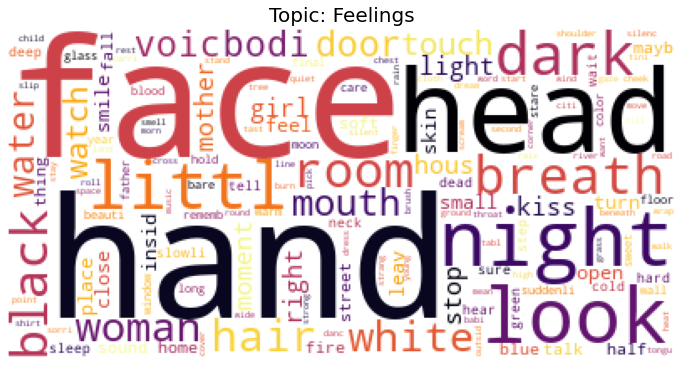

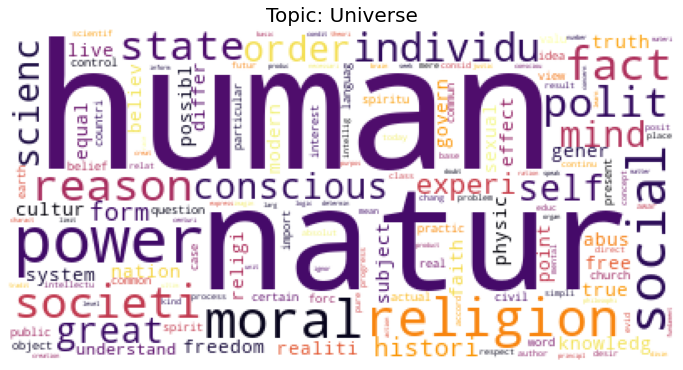

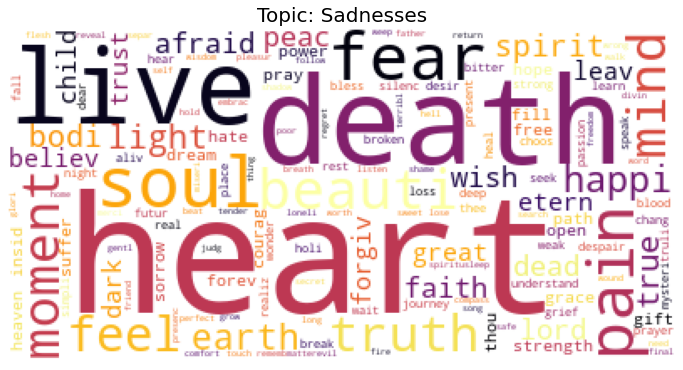

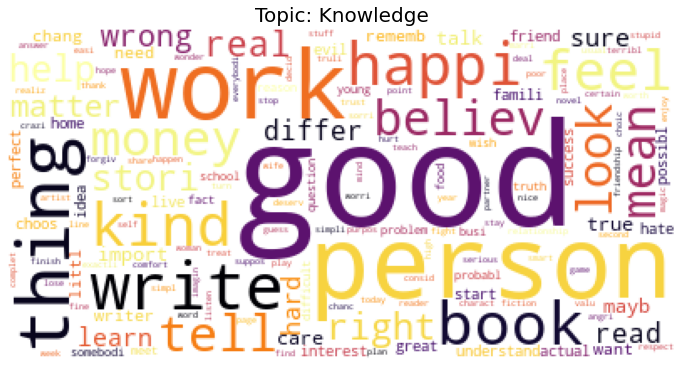

In [ ]:
from wordcloud import WordCloud
def get_word_freq(topic, model, n_top_words, vocab):
    """
    This method will be called to count the most frequent words in specific topic.
    """
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    return word_dict


words = list(np.asarray(vectorizer.get_feature_names()))
list_of_topics= ['Feelings','Universe','Sadnesses','Knowledge']
for topic in range(4):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud (background_color='white', colormap=plt.cm.inferno).fit_words(dict(get_word_freq(topic, nmf_model, 150, words))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();

<a id='cccc'></a>

# CorEx With Anchors With Supervised :

In [33]:
X = doc_top_prob['QuotWithout_Verb']
y = doc_top_prob['Tag_encoded']

In [34]:
cv = TfidfVectorizer(ngram_range=(1,2),max_df=0.90,min_df = 3)
cv_matrix = cv.fit_transform(X)
cv_array = cv_matrix.toarray()
df_vec = pd.DataFrame(data=cv_array,columns = cv.get_feature_names())
df_vec

,aback,abandon,abash,abbey,abdic,abdomin,aberr,abhor,abhorr,abid,...,zeal,zealou,zenith,zero,zigzag,zipper,zodiac,zombi,zone,zoolog
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8373,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8374,0.0,0.0,0.0,0.137877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
svd2 = TruncatedSVD(n_components=1500, n_iter=7, random_state=42)
svd2.fit(cv_matrix)
svdfeatures=svd2.transform(cv_matrix)

In [36]:
svd_ratio=svd2.explained_variance_ratio_
sum(svd_ratio)

0.6016243396724303

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
X_train, X_test, y_train, y_test = train_test_split(svdfeatures, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

<a id='ccccc'></a>

## **Logistic Regression:**

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1) 
lr.fit(X_train, y_train)
y_pred  = lr.predict(X_test)

In [39]:
from sklearn.metrics import  f1_score

accuracy_train_set = lr.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_set = lr.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_set = lr.score(X_test, y_test)  #get accuracy on test set

print('Logistic Regression Model')
print('Logistic Regression Model, Accuracy (Train Set) :', accuracy_train_set)
print('Logistic Regression Model, Accuracy (Val Set) : ', accuracy_valid_set)
print('Logistic Regression Model, Accuracy (test Set) :' , accuracy_test_set)
print("f1        :",f1_score(y_test,y_pred,average='micro'))



Logistic Regression Model
Logistic Regression Model, Accuracy (Train Set) : 0.810820895522388
Logistic Regression Model, Accuracy (Val Set) :  0.6778523489932886
Logistic Regression Model, Accuracy (test Set) : 0.7201670644391408
f1        : 0.7201670644391407


<a id='cccccc'></a>

## **RandomForestClassifier:**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
rf_clf = RandomForestClassifier(n_estimators = 100,max_features=5, max_depth=7,min_samples_leaf=2, random_state = 0)
rf_clf.fit(X_train, y_train)
y_pred  = rf_clf.predict(X_test)
accuracy_train_set = rf_clf.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_set = rf_clf.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_set = rf_clf.score(X_test, y_test)  #get accuracy on test set
print('Logistic Regression Model')
print('Logistic Regression Model, Accuracy (Train Set) :', accuracy_train_set)
print('Logistic Regression Model, Accuracy (Val Set) : ', accuracy_valid_set)
print('Logistic Regression Model, Accuracy (test Set) :' , accuracy_test_set)
print("f1        :",f1_score(y_test,y_pred,average='micro'))


Logistic Regression Model
Logistic Regression Model, Accuracy (Train Set) : 0.8281716417910447
Logistic Regression Model, Accuracy (Val Set) :  0.4459358687546607
Logistic Regression Model, Accuracy (test Set) : 0.4677804295942721
f1        : 0.4677804295942721


<a id='ccccccc'></a>

# CorEx With Anchors With SemiSupervised :

In [42]:
X_train, X_test = train_test_split(df[['QuotWithout_Verb','quote']], test_size=0.2)

In [43]:
vectorizer_first = CountVectorizer( max_df=0.50, min_df=0.001, binary=True)
quote_train = vectorizer_first.fit_transform(X_train['QuotWithout_Verb'])
quote_test = vectorizer_first.transform(X_test['QuotWithout_Verb'])

In [44]:
words = list(np.asarray(vectorizer_first.get_feature_names()))

In [45]:
topic_model = ct.Corex(n_hidden=4, words=words,
                       max_iter=1000, verbose=False, seed=1)

topic_model.fit(quote_train, words=words, docs=X_train, 
                anchors=[['death', 'fear', 'pain','afraid','suffer','dead','fail'], 
                         ['work', 'write', 'book','page','read'], 
                         ['human', 'natur', 'social','individu','true','experienc'], 
                         ['feel', 'heart', 'look','kiss'],
                         ], anchor_strength=1)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: death,earth,soul,great,fear,live,thou,pain,etern,evil
1: polit,govern,public,system,econom,sexual,nation,work,base,fact
2: human,natur,individu,societi,social,moral,cultur,self,state,scienc
3: head,night,hand,hair,face,breath,mouth,dark,blue,white


In [46]:
# probability of the topic given the qout
topic_model.p_y_given_x

array([[1.33400012e-01, 1.31397284e-03, 3.17700814e-02, 9.09178862e-01],
       [3.98803559e-02, 9.99577976e-01, 9.99999000e-01, 1.28446028e-06],
       [8.74472414e-01, 5.85804006e-04, 4.25101275e-04, 5.56220868e-06],
       ...,
       [1.95258386e-04, 9.99999000e-01, 9.99978002e-01, 5.96782818e-06],
       [1.80071533e-04, 6.98928391e-01, 9.99999000e-01, 1.39411823e-05],
       [1.12485420e-05, 2.02044919e-02, 6.29594767e-01, 4.09328358e-06]])

In [47]:
# labels for each qout
topic_model.labels

array([[False, False, False,  True],
       [False,  True,  True, False],
       [ True, False, False, False],
       ...,
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False, False,  True, False]])

In [48]:
# percent of qout labelled with a topic
sum(topic_model.labels.any(axis=1)) / X_train.shape[0]

0.7821222862206468

In [49]:
# shape of x train
X_train.shape

(9028, 2)

In [50]:
# shape of labels
topic_model.labels.shape

(9028, 4)

In [51]:
# create dataframe based on labels
df_corex = pd.DataFrame(data=topic_model.labels,   
                                              index=np.array(range(1, topic_model.labels.shape[0]+1)),
                                              columns=np.array(range(1, 5)))  

df_corex.columns = ['Sadnesses','Knowledge','Universe','Feelings']

In [52]:
df_corex['number_of_topics'] = df_corex.sum(axis=1)

In [53]:
# normalized distribution of number of topics
df_corex.number_of_topics.value_counts(normalize=True)

2021-12-30 21:03:06,942 : INFO : NumExpr defaulting to 4 threads.


1    0.409947
2    0.282455
0    0.217878
3    0.070780
4    0.018941
Name: number_of_topics, dtype: float64

In [54]:
df_corex

,Sadnesses,Knowledge,Universe,Feelings,number_of_topics
1,False,False,False,True,1
2,False,True,True,False,2
3,True,False,False,False,1
4,False,False,False,False,0
5,False,True,False,False,1
...,...,...,...,...,...
9024,False,True,True,False,2
9025,False,False,False,False,0
9026,False,True,True,False,2
9027,False,True,True,False,2


**Make predictions on test Quots data:**

In [55]:
topic_model.predict_proba(quote_test)[0]

array([[2.94495409e-01, 2.23197414e-05, 9.60280229e-01, 6.65732340e-03],
       [2.16128204e-04, 9.74304224e-02, 9.99675861e-03, 7.55895406e-04],
       [2.81358707e-03, 3.93871827e-03, 1.41766312e-05, 3.13910712e-02],
       ...,
       [3.51301142e-01, 9.96574093e-01, 3.00180581e-02, 1.00000000e-06],
       [2.75708277e-03, 9.99970380e-01, 4.08270685e-03, 1.00000000e-06],
       [9.98000405e-01, 3.48683144e-05, 8.37026181e-04, 4.66360909e-04]])

In [56]:
topic_model.predict_proba(quote_test)[0] > 0.50

array([[False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False,  True, False, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [57]:
topic_model.predict(quote_test)

array([[False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False,  True, False, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [58]:
predictions = pd.DataFrame(topic_model.predict_proba(quote_test)[0], columns=['Sadnesses','Knowledge','Universe','Feelings'])

In [59]:
predictions.head()

,Sadnesses,Knowledge,Universe,Feelings
0,0.294495,0.000022,0.960280,0.006657
1,0.000216,0.097430,0.009997,0.000756
2,0.002814,0.003939,0.000014,0.031391
3,0.010078,0.000231,0.000001,0.005879
4,0.000276,0.000052,0.000198,0.999999


In [60]:
def pred(x):
    if x.max() > 0.50:
        return x.idxmax() 
    else: 
        return 'other'
    
predictions['Topic Tag'] = predictions.apply(pred, axis=1)
predictions.head()

,Sadnesses,Knowledge,Universe,Feelings,Topic Tag
0,0.294495,0.000022,0.960280,0.006657,Universe
1,0.000216,0.097430,0.009997,0.000756,other
2,0.002814,0.003939,0.000014,0.031391,other
3,0.010078,0.000231,0.000001,0.005879,other
4,0.000276,0.000052,0.000198,0.999999,Feelings


In [61]:
# reset index
X_test_reset = X_test.reset_index()

In [62]:
# merge predicted topic with test dataset
results_df = pd.merge(X_test_reset, predictions, left_index=True, right_index=True)[['quote','Topic Tag']]

In [63]:
results_df

,quote,Topic Tag
0,dragged dead man thought ‘ come rushing dragge...,Universe
1,time spend confusion grasping trying piece for...,other
2,got street black woman broken house ”“ going a...,other
3,ago dream house red room reading textbook outs...,other
4,drove people close sent dashing madly flutteri...,Feelings
...,...,...
2253,deliberate strain weight arms pain thought stu...,Sadnesses
2254,world world world world great hero vision mere...,Universe
2255,time … time revolution time status quo disrupt...,Knowledge
2256,gone high school average kind best student cas...,Knowledge


In [64]:
results_df.loc[results_df['Topic Tag']=='Sadnesses']

,quote,Topic Tag
6,visit family love displayed kind closet chambe...,Sadnesses
29,afraid frightened forced choose particular pat...,Sadnesses
36,written ago ago thousand ago power today come ...,Sadnesses
48,soon culture s real thought sending kind flyin...,Sadnesses
61,believe god given trial purpose know day come ...,Sadnesses
...,...,...
2217,special blessing belong devote best contemplat...,Sadnesses
2242,nearly know growing rebellion present increasi...,Sadnesses
2243,tell step cell s confinement calmly cheerfully...,Sadnesses
2253,deliberate strain weight arms pain thought stu...,Sadnesses


In [65]:
print(results_df.iloc[29].quote, ": ", results_df['Topic Tag'].iloc[29])

afraid frightened forced choose particular path choosing path meant miss life live thinking future regret ‘ afraid ’ thought follow possible ended following important area life love commit romantic given entirely feared pain loss separation inevitable path love way path order suffer renounce love like order bad life :  Sadnesses
